In [29]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstest
from scipy.stats import levene
from itertools import combinations
import researchpy as rp
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import math
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
warnings.filterwarnings('ignore')

# Regresión Lineal VII. ANOVA

En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.

Hasta ahora habéis estado evaluando las características de vuestro set de datos y habéis hecho una gran exploración, es el momento de hacer vuestro primer ANOVA! En el ejercicio de hoy tendréis que hacer un ANOVA con vuestro datos y hacer una interpretación de los resultados.

📌 NOTA Puede que vuestros datos no se ajusten o no cumplan todas las asunciones, no pasa nada, haced el ANOVA e interpretad los resultados. En próximas lecciones aprenderemos que podemos hacer cuando nos encontramos en esta situación.

In [30]:
df = pd.read_csv("../data/sephora_estandar.csv", index_col = 0)
df.head(1)

,brand,category,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition,price_box
0,Acqua Di Parma,Fragrance,4.0,-0.215962,0.156305,66.0,Yes,No,No,8.343559


En este caso, ya hemos comprobado que nuestros datos no cumplen las asunciones para poder realizar el ANOVA, por lo que no será efectivo. No obstante, lo vamos a realizar para asentar conocimientos y poder saber como aplicarlo en futuros casos.

In [31]:
df.head(1)

,brand,category,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition,price_box
0,Acqua Di Parma,Fragrance,4.0,-0.215962,0.156305,66.0,Yes,No,No,8.343559


In [32]:
# Además, nos quedamos únicamente con las variables numéricas.

lm = ols("price ~ rating + number_of_reviews + love", data = df).fit() 
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
rating,1.0,8.030573e+01,80.305730,0.027799,0.867616
number_of_reviews,1.0,4.466086e+03,4466.086186,1.546018,0.214020
love,1.0,5.852246e+03,5852.246364,2.025863,0.154957
Residual,987.0,2.851213e+06,2888.767252,NaN,NaN


In [33]:
# Resumen de la recta que ajusta nuestro modelo y da como resultados varias cosas. 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.200
Date:                Wed, 13 Sep 2023   Prob (F-statistic):              0.309
Time:                        16:49:40   Log-Likelihood:                -5352.6
No. Observations:                 991   AIC:                         1.071e+04
Df Residuals:                     987   BIC:                         1.073e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           102.8305      6.262     16.420      0.000      90.541     115.120
rating                0.2897      1.482      0.196      0.845      -2.618       3.198
number_of_reviews    -1.8300      0.969     -1.888      0.059      -3.732       0.072
love                  1.8494      1.299      1.423      0.155      -0.700       4.399
==============================================================================
Omnibus:                      262.727   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.414
Skew:                           1.391   Prob(JB):                    1.75e-143
Kurtosis:                       5.860   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En lo que más nos fijamos es en el coeficiente que muestra cuánto cambia la variable que tratamos de predecir si una de las variables predictoras cambia una unidad manteniendo el resto igual.

#### Resultados:

- Se puede ver que las columnas de "love" y de "rating" sí afectan a nuestra variable respuesta, además de manera positiva, por lo que cuando aumenta cualquiera de esas dos columnas en una unidad, el precio también lo hace.

- El resto de las columnas no parecen afectar a nuestra variable respuesta. 
    
No obstante, hay que tener en cuenta que nuestros datos **no cumplen las tres asunciones** de normalidad, homocedasticidad e independencia, por lo que este ANOVA no es nada fiable.


In [34]:
# Probamos con algunas categóricas, para ver también cómo éstas afectan a la variable respuesta. 

lm2 = ols("price ~ category + rating + number_of_reviews + love + online_only", data = df).fit() 
sm.stats.anova_lm(lm2)

,df,sum_sq,mean_sq,F,PR(>F)
category,4.0,2.284300e+05,57107.493387,22.379672,1.047899e-17
online_only,1.0,9.334105e+04,93341.047599,36.579123,2.081274e-09
rating,1.0,1.387189e+04,13871.888663,5.436210,1.992493e-02
number_of_reviews,1.0,1.122170e+04,11221.704029,4.397637,3.624401e-02
love,1.0,8.921519e+03,8921.518855,3.496225,6.180625e-02
Residual,982.0,2.505826e+06,2551.757417,NaN,NaN


In [35]:
# Resumen de la recta que ajusta nuestro modelo y da como resultados varias cosas. 

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     17.43
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.96e-24
Time:                        16:49:40   Log-Likelihood:                -5288.6
No. Observations:                 991   AIC:                         1.060e+04
Df Residuals:                     982   BIC:                         1.064e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       114.2569      8.248     13.853      0.000      98.072     130.442
category[T.Cologne Gift Sets]    -7.9112     15.646     -0.506      0.613     -38.615      22.793
category[T.Fragrance]           -70.7502     12.542     -5.641      0.000     -95.362     -46.139
category[T.Perfume]              10.4842      4.561      2.299      0.022       1.535      19.434
category[T.Perfume Gift Sets]   -35.2771      6.300     -5.600      0.000     -47.640     -22.914
online_only[T.Yes]               23.2301      4.201      5.529      0.000      14.985      31.475
rating                           -3.7094      1.558     -2.382      0.017      -6.766      -0.653
number_of_reviews                -2.5442      0.917     -2.774      0.006      -4.344      -0.744
love                              2.3146      1.238      1.870      0.062      -0.115       4.744
==============================================================================
Omnibus:                      272.132   Durbin-Watson:                   1.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.183
Skew:                           1.428   Prob(JB):                    5.50e-153
Kurtosis:                       5.970   Cond. No.                         49.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Por lo general, algunas variables categóricas afectan y otras no de manera significativa al precio. Por ejemplo, cuando la colonia se vende en un set, el precio disminuye. No obstante, de nuevo hay que tener en cuenta que el modelo ANOVA en nuestro caso no es fiable.

# Regresión Lineal VIII. ENCODING

En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:

1. Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.

2. Recordad que lo primero que deberéis hacer es decidir si vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.

### Vamos a comprobar el orden de las variables categóricas en función de su mediana con respecto a la variable predictora:

#### Para la columna category:

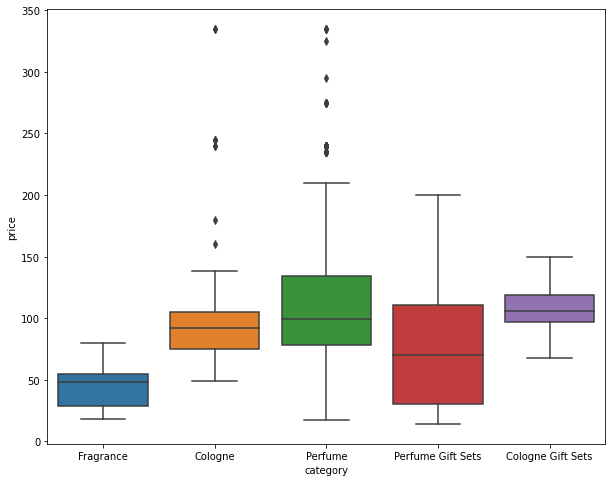

In [36]:
sns.boxplot(x = "category", y = "price", data = df);

Con ayuda del boxplot visualizamos las diferentes categorías que tenemos en la columna 'category' y comprobamos que siguen un orden: 0 = Fragance, 1 = Perfume Gift Sets, 2 = Cologne, 3 = Perfume y 4 = Cologne Gift Sets.

In [37]:
def encoder_map(df, columna, orden_valores):
    """
    Esta función realiza un encoding con el método map().
    Args:
    df(DataFrame): DataFrame sobre el que queremos aplicar la función.
    columna (str): columna sobre la que queremos aplicar la función.
    orden_valores (list): lista con los nombres de los valores.
    Returns: Dataframe
    """ 
    ordinal_dict = {}
    
    for i, valor in enumerate(orden_valores):
        ordinal_dict[valor] = i 

    columna_nueva = columna + "_map"

    df[columna_nueva] = df[columna].map(ordinal_dict)
    return df

In [38]:
# Orden que le damos.

orden = ["Fragrance", "Perfume Gift Sets", "Cologne", "Perfume", "Cologne Gift Sets"]

In [39]:
# Aplicamos la función.

df = encoder_map(df, "category", orden)
df.head()

,brand,category,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition,price_box,category_map
0,Acqua Di Parma,Fragrance,4.0,-0.215962,0.156305,66.0,Yes,No,No,8.343559,0
1,Acqua Di Parma,Cologne,4.5,0.460094,0.097447,66.0,Yes,No,No,8.343559,2
2,Acqua Di Parma,Perfume,4.5,-0.009390,0.077958,180.0,Yes,No,No,12.422912,3
3,Acqua Di Parma,Perfume,4.5,-0.037559,0.136426,120.0,Yes,No,No,10.626234,3
4,Acqua Di Parma,Fragrance,3.5,-0.234742,-0.244981,72.0,Yes,No,No,8.651025,0


#### Para la columna brand:

In [40]:
# Sacamos la mediana del precio en función de la marca y lo ordenamos de menor a mayor.

df2 = df.groupby("brand")["price"].median().sort_values().reset_index()
df2.head()

,brand,price
0,SEPHORA COLLECTION,17.0
1,Commodity,26.0
2,Pink Sugar,30.0
3,TokyoMilk,42.0
4,Comptoir Sud Pacifique,42.0


In [41]:
# Creamos una nueva columna con el encoding dándole un nº del 0 hasta el final.

df2.insert(0, "brand_encoding", range(0, len(df2)))

In [42]:
# Comprobamos que se ha realizado.

df2.head(10)

,brand_encoding,brand,price
0,0,SEPHORA COLLECTION,17.0
1,1,Commodity,26.0
2,2,Pink Sugar,30.0
3,3,TokyoMilk,42.0
4,4,Comptoir Sud Pacifique,42.0
5,5,Elizabeth and James,48.0
6,6,Sol de Janeiro,48.5
7,7,Fresh,50.0
8,8,philosophy,50.0
9,9,SKYLAR,53.5


In [43]:
# Eliminamos la mediana para poder unirlo después.

df2.drop("price", axis = 1, inplace = True)

In [44]:
# Unimos ambos DataFrames por la columan "brand".

df = pd.merge(df, df2, on = "brand", how = "left")
df.head()

,brand,category,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition,price_box,category_map,brand_encoding
0,Acqua Di Parma,Fragrance,4.0,-0.215962,0.156305,66.0,Yes,No,No,8.343559,0,63
1,Acqua Di Parma,Cologne,4.5,0.460094,0.097447,66.0,Yes,No,No,8.343559,2,63
2,Acqua Di Parma,Perfume,4.5,-0.009390,0.077958,180.0,Yes,No,No,12.422912,3,63
3,Acqua Di Parma,Perfume,4.5,-0.037559,0.136426,120.0,Yes,No,No,10.626234,3,63
4,Acqua Di Parma,Fragrance,3.5,-0.234742,-0.244981,72.0,Yes,No,No,8.651025,0,63


Hemos sacado la mediana de cada una de las categorías de la columna "brand" en función del precio("price"), y en función del valor de cada una hemos realizado el encoding de menor a mayor, dándoles un número del 0 al 76.

#### Para la columna online_only:

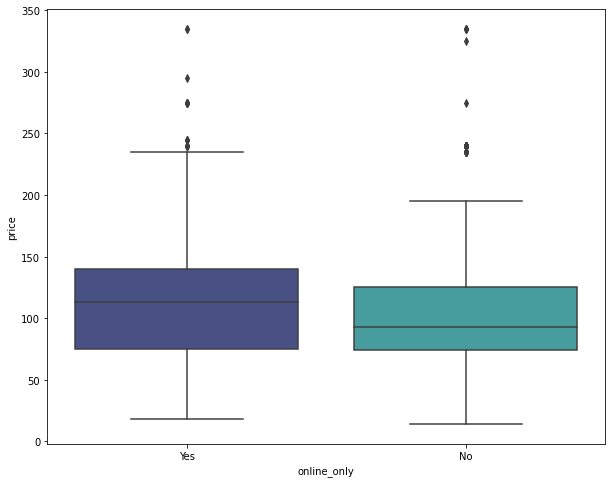

In [45]:
sns.boxplot(x = "online_only", y = "price", data = df, palette = "mako");

Hemos sacado la mediana de la columna "online_only" y comprobamos que afecta al precio muy ligeramente, por lo que consideramos que no tiene orden. 

In [46]:
# Aplicamos el método getdummies. 

dummies = pd.get_dummies(df["online_only"], prefix = "online_only", prefix_sep = "_", dtype = int)

In [47]:
# Lo unimos al DataFrame original.

df = pd.concat([df, dummies], axis = 1)
df.head(2)

,brand,category,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition,price_box,category_map,brand_encoding,online_only_No,online_only_Yes
0,Acqua Di Parma,Fragrance,4.0,-0.215962,0.156305,66.0,Yes,No,No,8.343559,0,63,0,1
1,Acqua Di Parma,Cologne,4.5,0.460094,0.097447,66.0,Yes,No,No,8.343559,2,63,0,1


#### Para la columna exclusive:

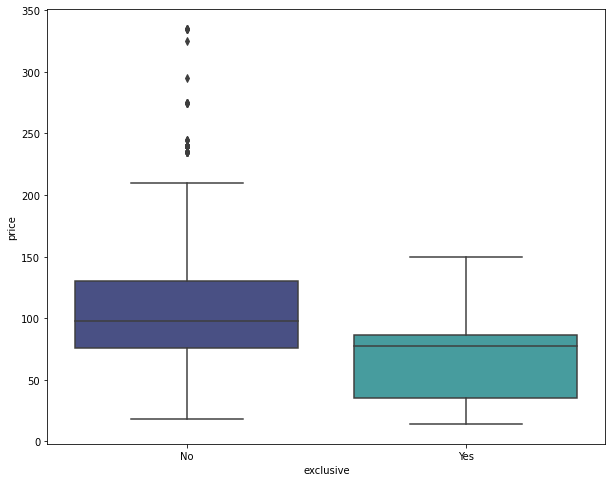

In [48]:
sns.boxplot(x = "exclusive", y = "price", data = df, palette = "mako");

Tampoco consideramos que exclusive afecte de manera significativa al precio, por lo que tampoco tiene orden. 

In [49]:
# Realizamos el método getdummies y lo aplicamos.

dummies2 = pd.get_dummies(df["exclusive"], prefix = "exclusive", prefix_sep='_', dtype = int)
df = pd.concat([df, dummies2], axis = 1)
df.head(2)

,brand,category,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition,price_box,category_map,brand_encoding,online_only_No,online_only_Yes,exclusive_No,exclusive_Yes
0,Acqua Di Parma,Fragrance,4.0,-0.215962,0.156305,66.0,Yes,No,No,8.343559,0,63,0,1,1,0
1,Acqua Di Parma,Cologne,4.5,0.460094,0.097447,66.0,Yes,No,No,8.343559,2,63,0,1,1,0


#### Para la columna limited_edition:

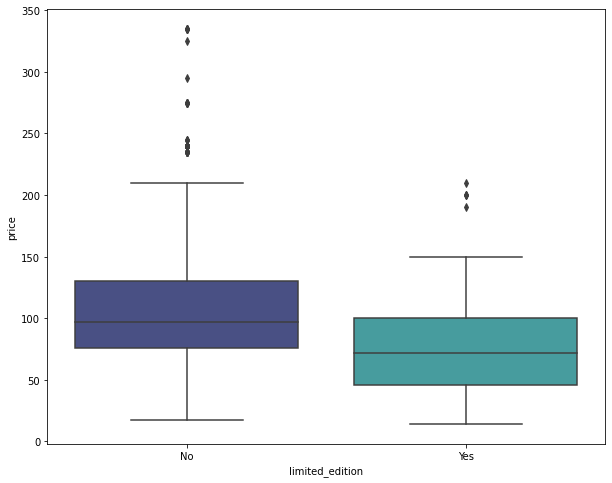

In [50]:
sns.boxplot(x = "limited_edition", y = "price", data = df, palette = "mako");

In [51]:
# Realizamos el método getdummies y lo aplicamos.

dummies3 = pd.get_dummies(df["limited_edition"], prefix = "limited_edition", prefix_sep='_', dtype = int)
df = pd.concat([df, dummies3], axis = 1)
df.head(2)

,brand,category,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition,price_box,category_map,brand_encoding,online_only_No,online_only_Yes,exclusive_No,exclusive_Yes,limited_edition_No,limited_edition_Yes
0,Acqua Di Parma,Fragrance,4.0,-0.215962,0.156305,66.0,Yes,No,No,8.343559,0,63,0,1,1,0,1,0
1,Acqua Di Parma,Cologne,4.5,0.460094,0.097447,66.0,Yes,No,No,8.343559,2,63,0,1,1,0,1,0


#### Para la columna rating:

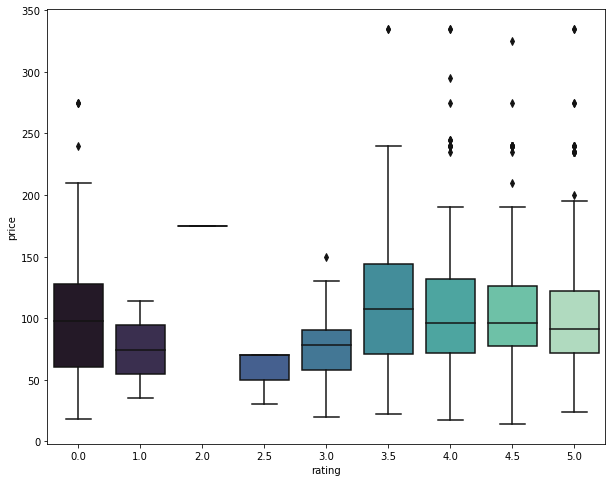

In [52]:
sns.boxplot(x = "rating", y = "price", data = df, palette = "mako");

En este caso sí que creemos que hay un orden. Por lo tanto, le daremos el siguiente encoding:

2.0: 2

0.0, 3.0, 3.5, 4.0, 4.5, 5.0: 1

1.0, 2.5: 0


In [53]:
def reseña(columna):
    """
    Esta función realiza un encoding de la columna que indiquemos.
    Args:
        columna(Serie): columna que contiene datos de tipo float.
    Returns: con los datos codificados.
    """
    if columna == 1.0 or columna == 2.5:
        return 0

    elif columna == 0.0 or columna == 3.0 or columna == 3.5 or columna == 4.0 or columna == 4.5 or columna == 5.0:
        return 1

    elif columna == 2.0:
        return 2

In [54]:
# Aplicamos la función.

df["rating_map"] = df["rating"].apply(reseña)

In [55]:
# Comprobamos que se ha realizado.

df["rating_map"].unique()

array([1, 0, 2])

3. Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [56]:
df.to_csv("../data/sephora_encoding.csv")